# College Data Frame with Tree Methods

## Exploratory Data Analysis

#### Get the Data

In [5]:
library(ISLR)
df <- College
head(df)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


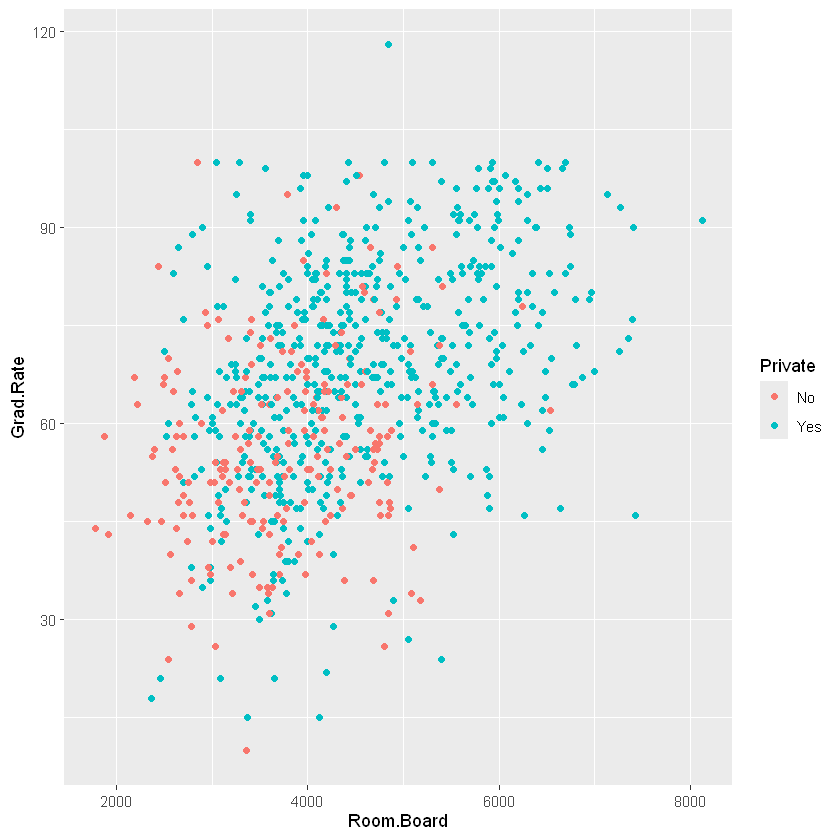

In [9]:
# Scatter Plot of GradRate vs. Room.Board colored by Private
library(ggplot2)
pl <- ggplot(df, aes(x=Room.Board, y=Grad.Rate, color=Private)) + geom_point()
pl

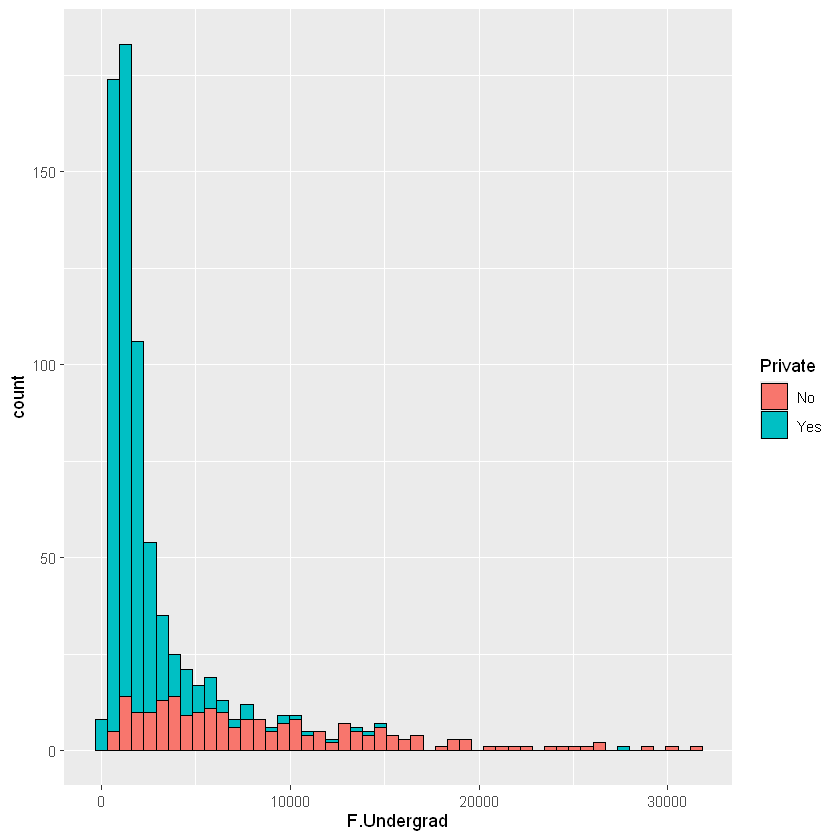

In [43]:
# Histogram of fulltime undergrad students, color by Private
pl2 <- ggplot(df, aes(x=F.Undergrad)) + geom_histogram(aes(fill = Private),color='black',bins=50, position = position_stack(reverse=T)) 
pl2

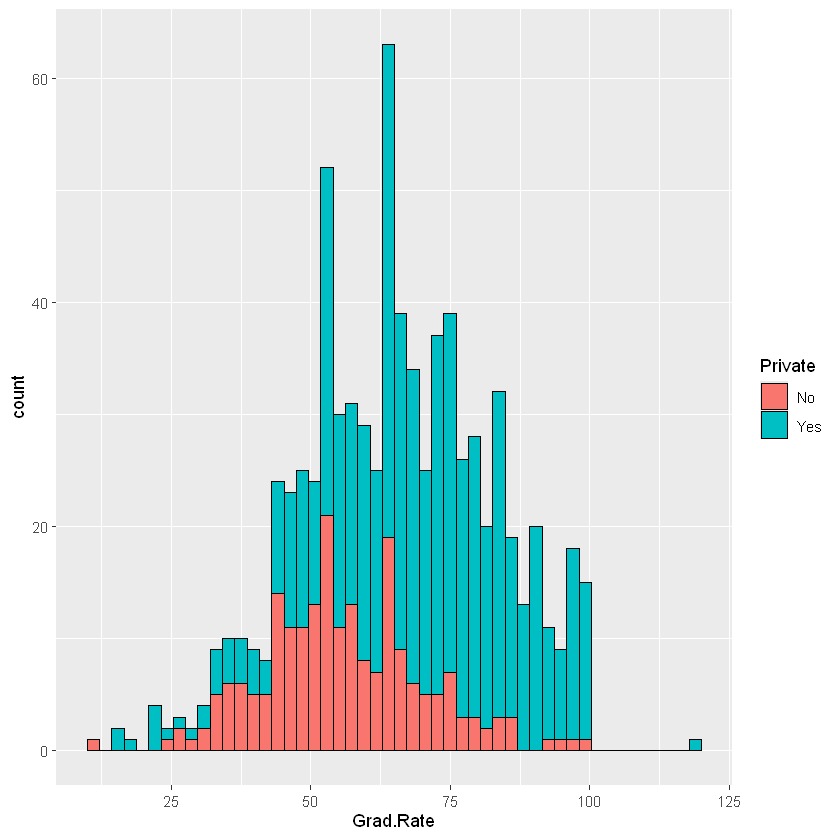

In [48]:
# Histogram of Grad.Rate colored by Private
pl3 <- ggplot(df, aes(x=Grad.Rate, fill=Private)) + geom_histogram(color='black', bins=50, position = position_stack(reverse=T))
pl3

* There is a record with more than 100% grad rate


In [50]:
library(dplyr)
over_100 <- df %>% filter(Grad.Rate > 100) %>% select(Grad.Rate)
print(over_100)

                  Grad.Rate
Cazenovia College       118


In [53]:
# Correct the wrong Grad.rate record to 100%
df['Cazenovia College', 'Grad.Rate'] <- 100
df['Cazenovia College', 'Grad.Rate'] 

[1] 100

## Train Test Split

In [55]:
library(caTools)
set.seed(101)
split <- sample.split(df$Private, SplitRatio = 0.7)
train <- filter(df, split == T)
test <- filter(df, split == F)

## Build Decision Tree

In [66]:
# CART Tree
library(rpart)
library(rpart.plot)
# Build a tree with train dataset
tree <- rpart(Private ~., method = 'class', data=train)
printcp(tree)
print("----------------------------------------------")
# Predict with test data
predictions <- predict(tree, test)
print(head(predictions))
print("----------------------------------------------")
predictions_classification <- predict(tree, test, type='class')
print(head(predictions_classification))


Classification tree:
rpart(formula = Private ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] Accept      Enroll      F.Undergrad Outstate    P.Undergrad Top10perc  

Root node error: 148/544 = 0.27206

n= 544 

        CP nsplit rel error  xerror     xstd
1 0.486486      0   1.00000 1.00000 0.070132
2 0.216216      1   0.51351 0.63514 0.059581
3 0.027027      2   0.29730 0.43919 0.051117
4 0.020270      3   0.27027 0.39189 0.048637
5 0.010000      8   0.15541 0.37838 0.047890
[1] "----------------------------------------------"
                                                 No       Yes
Adrian College                          0.003311258 0.9966887
Alfred University                       0.003311258 0.9966887
Allegheny College                       0.003311258 0.9966887
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887
Alma College                            0.003311258 0.9966887
Amherst College                         0.003311258 0

In [96]:
# Confusion Matrix
matrix <- table(predictions_classification,test$Private)
print(matrix)

# Metrics
accuracy =  sum(diag(matrix))/ sum(matrix)
print('accuracy')
print(accuracy)
precision = matrix[2,2] / sum(matrix[,2])
print('precision')
print(precision)
print('recall')
recall = matrix[2,2] / sum(matrix[2,])
print(recall)



                          
predictions_classification  No Yes
                       No   57   9
                       Yes   7 160
[1] "accuracy"
[1] 0.9313305
[1] "precision"
[1] 0.9467456
[1] "recall"
[1] 0.9580838


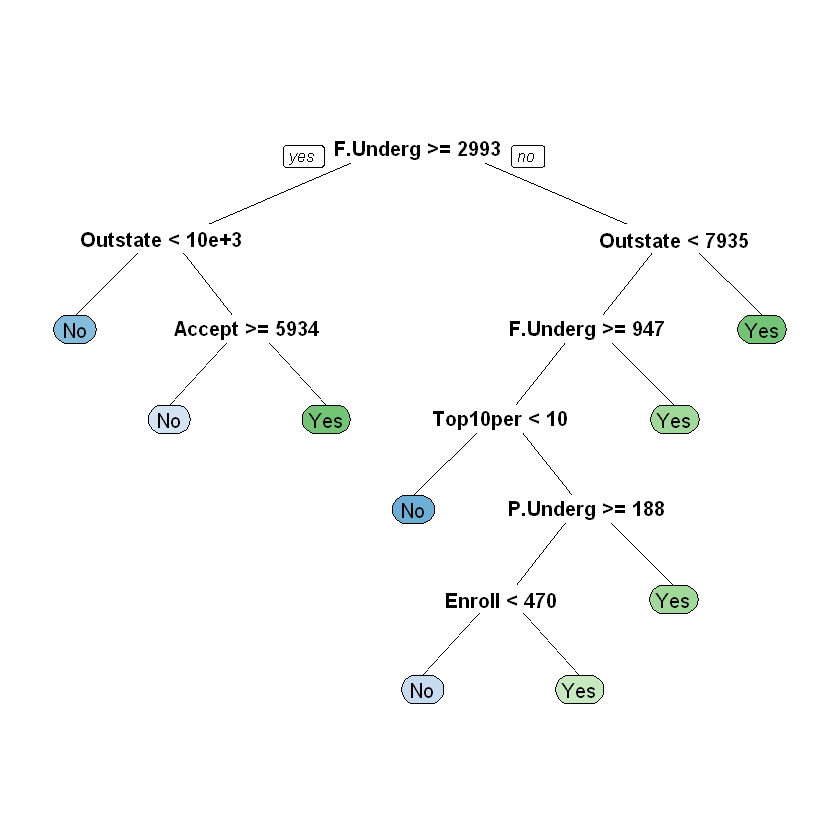

In [72]:
# Plot the tree model
prp(tree,box.palette="auto")

## Build Random Forest

#### Build a model

In [73]:
library(randomForest)
rf.model <- randomForest(Private ~., method='class', data=train, importance=T)
# Confusion matrix
rf.model$confusion

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin




,No,Yes,class.error
No,125,23,0.15540541
Yes,12,384,0.03030303


In [74]:
# Check the feature importance
print(rf.model$importance)

                     No          Yes MeanDecreaseAccuracy MeanDecreaseGini
Apps        0.022046347 0.0135686625         0.0158177906         7.646283
Accept      0.027651190 0.0154716761         0.0187306527        11.513935
Enroll      0.037271066 0.0315961888         0.0330989552        26.086397
Top10perc   0.011004197 0.0043401463         0.0061580815         5.880156
Top25perc   0.006828662 0.0033363487         0.0042307103         4.294602
F.Undergrad 0.149164734 0.0686210147         0.0902188776        40.746407
P.Undergrad 0.041624456 0.0063664936         0.0159799104        15.654392
Outstate    0.148179085 0.0598979493         0.0839145714        39.384044
Room.Board  0.018510072 0.0148520988         0.0158114040        11.330630
Books       0.001843507 0.0003421010         0.0007440975         2.060881
Personal    0.004481070 0.0007445565         0.0017344634         3.523296
PhD         0.009928737 0.0050882597         0.0064223364         4.694555
Terminal    0.001896629 0

#### Prediction

In [97]:
predictions <- predict(rf.model, test, type='class')
confusion_matrix <- table(predictions,test$Private)
print(confusion_matrix)
# Metrics
accuracy =  sum(diag(confusion_matrix))/ sum(confusion_matrix)
print('accuracy')
print(accuracy)
precision = confusion_matrix[2,2] / sum(confusion_matrix[,2])
print('precision')
print(precision)
print('recall')
recall = confusion_matrix[2,2] / sum(confusion_matrix[2,])
print(recall)


           
predictions  No Yes
        No   57   6
        Yes   7 163
[1] "accuracy"
[1] 0.944206
[1] "precision"
[1] 0.964497
[1] "recall"
[1] 0.9588235


##### **Results from a Single Tree:**
* Accuracy: 0.9313305
* Precision: 0.9467456
* Recall: 0.9580838

##### **Results from a Single Tree:**
* Accuracy: 0.944206
* Precision: 0.964497
* Recall: 0.9588235

##### Evaluation Summary
- **The second tree is better overall**, with **higher accuracy and precision** while maintaining similar recall.
- The improvements suggest **better decision boundary refinement** in the second tree, possibly due to **tuning parameters or better splits**.
- If **false positives are costly**, the second tree is the **better choice** due to its higher precision.
